In [ ]:
#### In Data Analysis We will Analyze To Find out the below stuff
1. Missing Values
2. All The Numerical Variables
3. Distribution of the Numerical Variables
4. Categorical Variables
5. Cardinality of Categorical Variables
6. Outliers
7. Relationship between independent and dependent feature(price)

In [42]:
#lecture data 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
## Display all the columns of the dataframe

pd.pandas.set_option('display.max_columns',None)

dataset = pd.read_csv("centris_montreal_complete.csv")
dataset.head()

,Unnamed: 0,title,address,price,lat,long,Restaurants,Shopping,Vibrant,Cycling friendly,Car friendly,Historic,Quiet,Elementary Schools,High Schools,Parks,Nightlife,Groceries,Daycares,Pedestrian friendly,Cafes,Transit friendly,Greenery,rooms,bedrooms,bathroom,Condominium type,Net area,Year built,Parking (total),Population 2016,Population variation between 2011 2016,Population density,Unemployment rate 2016,"Less than $50,000 (%)","Between $50,000 and $80,000 (%)","Between $80,000 and $100,000 (%)","Between $100,000 and $150,000 (%)","More than $150,000 (%)",1-person households (%),2-person households (%),3-person households (%),4-person households (%),5-person or more households (%),Couples without children at home (%),Couples with children at home (%),Single-parent families (%),Owners (%),Renters (%),Before 1960 (%),Between 1961 and 1980 (%),Between 1981 and 1990 (%),Between 1991 and 2000 (%),Between 2001 and 2010 (%),Between 2011 and 2016 (%),Single-family homes (%),Semi-detached or row houses (%),Buildings with less than 5 floors (%),Buildings with 5 or more floors (%),Mobile homes (%),University (%),College (%),Secondary (high) school (%),Apprentice or trade school diploma (%),No diploma (%),Non-immigrant population (%),Immigrant population (%),French (%),English (%),Others languages (%),bathrooms,Pool,Additional features,walk_score,bedroom,Gross area,powder room,Building style,Lot area,Fireplace/Stove,in basement,Use of property,Number of units,Residential units,Main unit,Potential gross revenue,powder rooms,Intergenerational,Building area (at ground level),room,Available area,Residential unit,bedrooms in basement,Zoning,Parking (excluded from the price),bedroom in basement,< 15 years (%),15 to 24 years (%),25 to 44 years (%),45 to 64 years (%),> 65 years (%)
0,0,Condo for sale,"5050, Rue Bannantyne, apt. 203, Montréal (Verd...","$409,000",45.456079,-73.575949,7.0,8.0,5.0,9.0,6.0,5.0,8.0,10.0,7.0,10,3.0,9.0,9.0,10.0,5.0,8.0,5.0,8.0,2.0,1.0,Divided,"1,014 sqft",2008,Garage (1),69229,5,7181,8,45,22,9,12,11,42,34,13,8,3,46,36,18,37,63,46,21,13,8,9,4,3,7,69,21,0,43,16,18,9,14,75,25,64.0,22.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Condo for sale,"201, Chemin de la Pointe-Sud, apt. 216, Montré...","$680,000",45.449347,-73.553327,3.0,3.0,1.0,7.0,10.0,0.0,10.0,7.0,0.0,8,0.0,2.0,4.0,3.0,1.0,4.0,5.0,6.0,3.0,NaN,Divided,"1,249 sqft",2006,Garage (2),69229,5,7181,8,45,22,9,12,11,42,34,13,8,3,46,36,18,37,63,46,21,13,8,9,4,3,7,69,21,0,43,16,18,9,14,75,25,64.0,22.0,14.0,2.0,"Heated, Inground",Elevator,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Condo for sale,"8800, Rue Verville, apt. 101, Montréal (Ahunts...","$283,000",45.536589,-73.646590,8.0,10.0,5.0,3.0,6.0,2.0,0.0,9.0,7.0,8,4.0,10.0,6.0,8.0,6.0,9.0,4.0,6.0,2.0,1.0,Divided,848 sqft,2007,Garage (1),134245,6,5545,10,49,23,9,11,9,41,27,13,12,7,34,46,20,39,61,37,33,14,6,6,4,9,5,73,13,0,36,16,20,10,17,59,41,65.0,10.0,25.0,NaN,NaN,NaN,72.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Condo for sale,"185, Rue du Séminaire, apt. 605, Montréal (Le ...","$339,000",45.490915,-73.560779,10.0,10.0,9.0,9.0,5.0,6.0,7.0,7.0,4.0,10,9.0,10.0,8.0,10.0,10.0,9.0,5.0,4.0,NaN,1.0,Divided,NaN,2013,NaN,80153,9,5070,8,50,22,9,11,7,46,32,11,7,4,44,32,24,35,65,43,18,11,5,10,13,2,7,71,20,0,38,16,19,9,18,74,26,59.0,26.0,15.0,NaN,"Heated, Inground, Indoor","Adapted for reduced mobility, Elevator",70.0,1.0,621 sqft,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Condo for sale,"7075, Rue Bombardier, apt. 108, Montréal (Anjou)","$177,800",45.606186,-73.588353,6.0,7.0,3.0,4.0,9.0,0.0,6.0,4.0,5.0,8,3.0,9.0,2.0,7.0,4.0,7.0,5.0,6.0,NaN,1.0,Divided,586 sqft,1993,Driveway (1),42796,2,3103,10,45,26,10,12,7,38,31,13,12,7,38,41,21,44,56,15,49

In [2]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5732 entries, 0 to 5731
Columns: 101 entries, Unnamed: 0 to > 65 years (%)
dtypes: float64(37), int64(39), object(25)
memory usage: 4.4+ MB


In [3]:
## Here we will check the type of each feature

for feature in dataset.columns: 
    print(feature, ", type:",dataset[feature].dtypes)

Unnamed: 0 , type: int64
title , type: object
address , type: object
price , type: object
lat , type: float64
long , type: float64
Restaurants , type: float64
Shopping , type: float64
Vibrant , type: float64
Cycling friendly , type: float64
Car friendly , type: float64
Historic , type: float64
Quiet , type: float64
Elementary Schools , type: float64
High Schools , type: float64
Parks , type: int64
Nightlife , type: float64
Groceries , type: float64
Daycares , type: float64
Pedestrian friendly , type: float64
Cafes , type: float64
Transit friendly , type: float64
Greenery , type: float64
rooms , type: float64
bedrooms , type: float64
bathroom , type: float64
Condominium type , type: object
Net area , type: object
Year built , type: object
Parking (total) , type: object
Population 2016  , type: int64
Population variation between 2011 2016  , type: int64
Population density  , type: int64
Unemployment rate 2016  , type: int64
Less than $50,000 (%) , type: int64
Between $50,000 and $80,000 

### 1) Missing Values

In [4]:
## Here we will check the percentage of nan values present in each feature
## 1 -step make the list of features which has missing values
features_with_nan= [feature for feature in dataset.columns if dataset[feature].isnull().sum()>1]

## 2- step print the feature name and the percentage of missing values
for feature in features_with_nan:
    print(feature, np.round((dataset[feature].isnull().mean()),2)*100,"% of missing values")


Restaurants 0.0 % of missing values
Shopping 0.0 % of missing values
Vibrant 0.0 % of missing values
Cycling friendly 0.0 % of missing values
Car friendly 0.0 % of missing values
Historic 0.0 % of missing values
Quiet 0.0 % of missing values
Elementary Schools 0.0 % of missing values
High Schools 0.0 % of missing values
Nightlife 0.0 % of missing values
Groceries 0.0 % of missing values
Daycares 0.0 % of missing values
Pedestrian friendly 0.0 % of missing values
Cafes 0.0 % of missing values
Transit friendly 0.0 % of missing values
Greenery 0.0 % of missing values
rooms 19.0 % of missing values
bedrooms 37.0 % of missing values
bathroom 55.00000000000001 % of missing values
Condominium type 36.0 % of missing values
Net area 52.0 % of missing values
Year built 2.0 % of missing values
Parking (total) 35.0 % of missing values
bathrooms 64.0 % of missing values
Pool 76.0 % of missing values
Additional features 44.0 % of missing values
walk_score 1.0 % of missing values
bedroom 83.0 % of mi

#### Since they are many missing values, we need to find the relationship between missing values and Price
> Let's plot some diagram for this relationship


In [43]:
# converte price object to float
dataset["price"]= dataset["price"].str.replace("$","")
dataset["price"]= dataset["price"].str.replace(",","")
dataset["price"]= dataset["price"].astype(float)

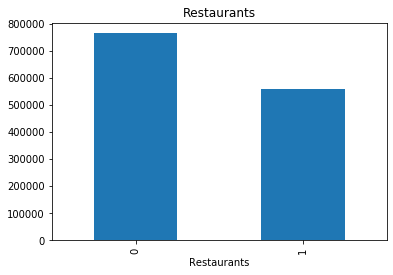

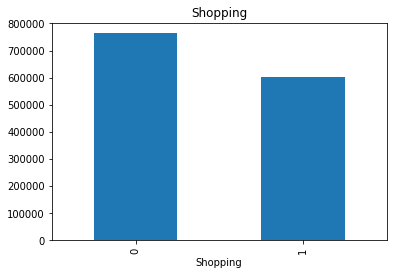

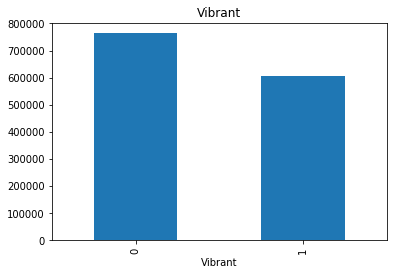

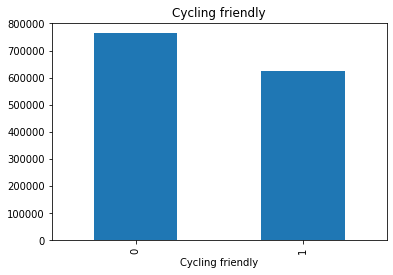

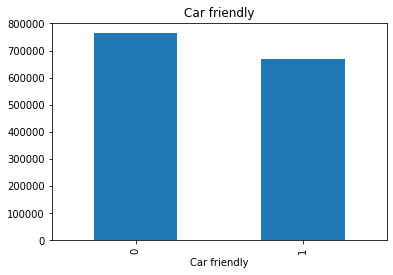

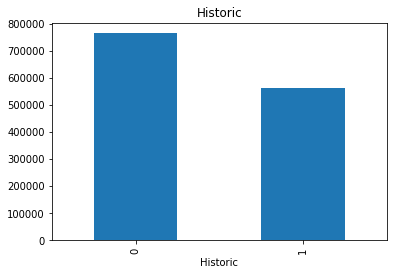

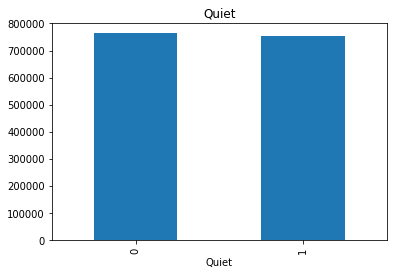

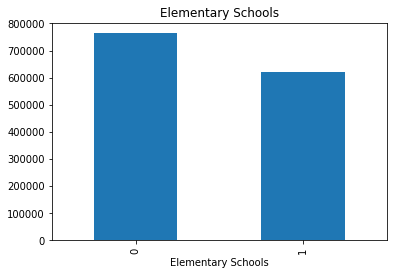

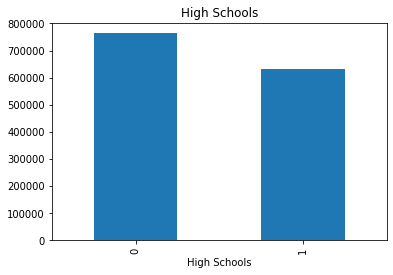

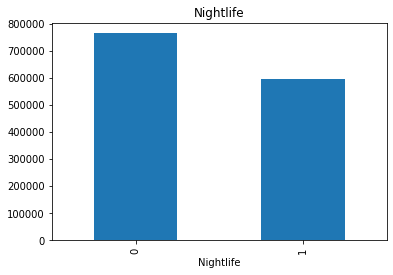

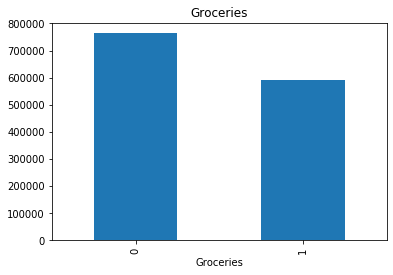

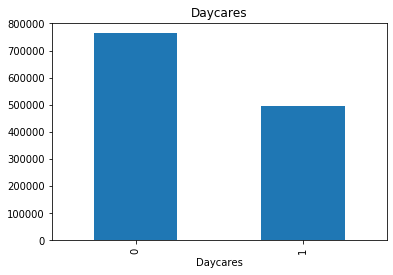

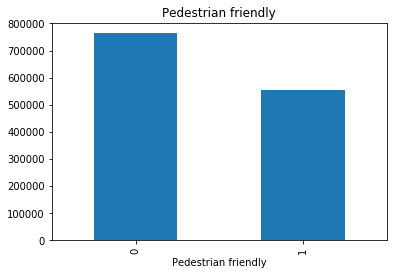

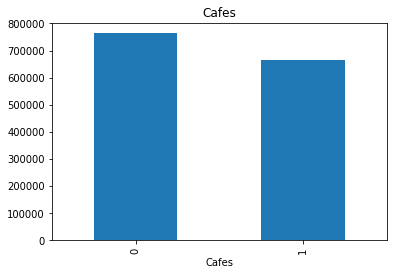

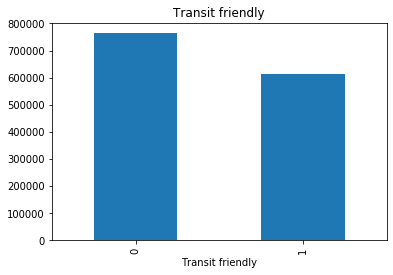

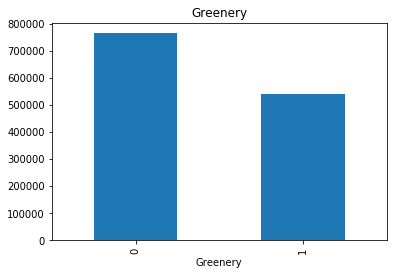

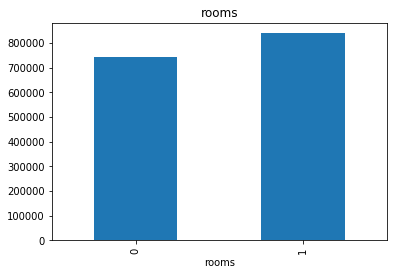

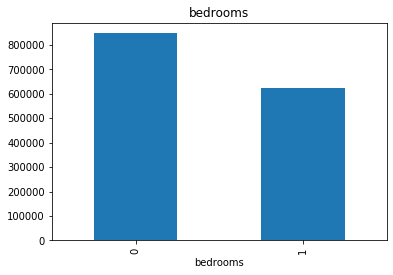

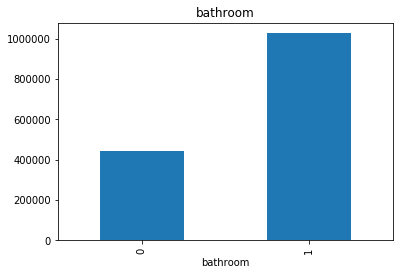

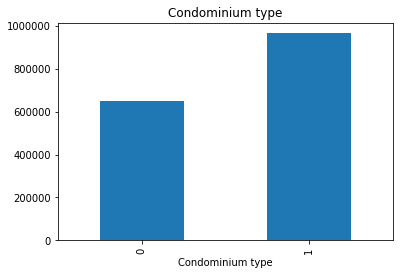

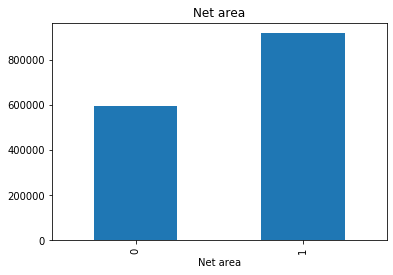

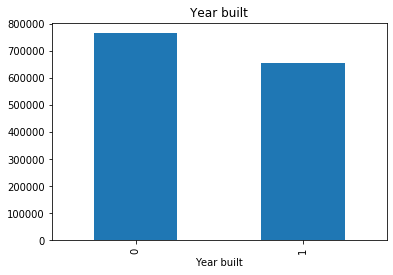

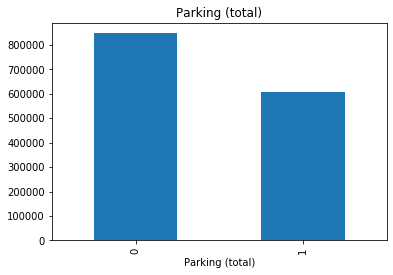

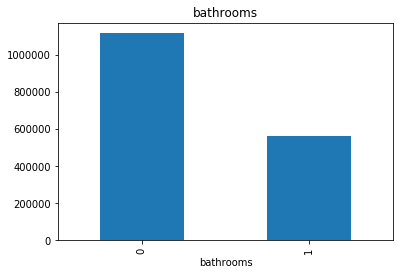

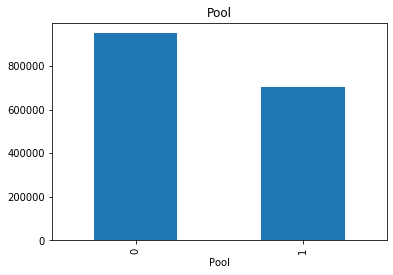

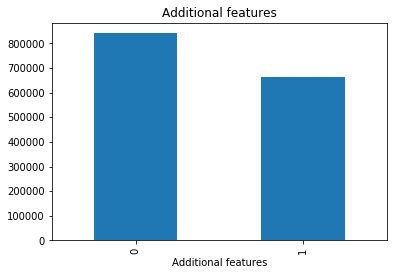

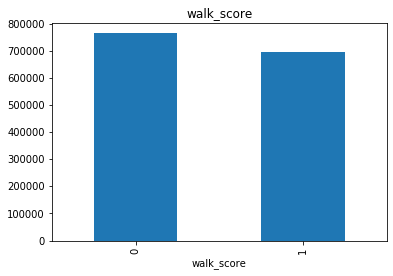

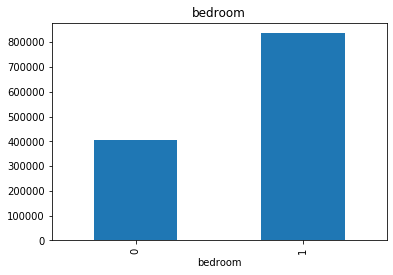

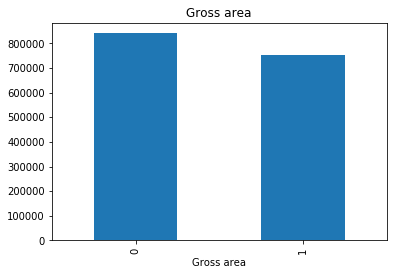

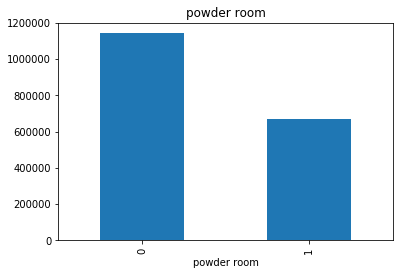

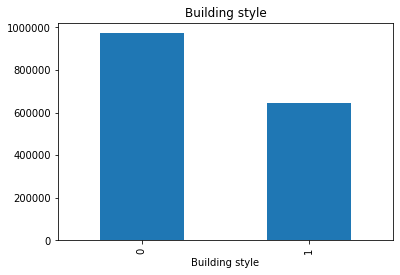

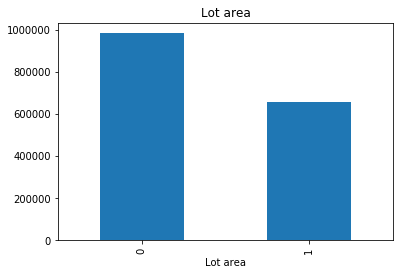

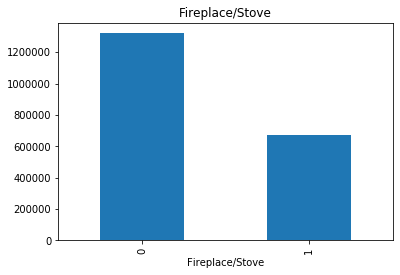

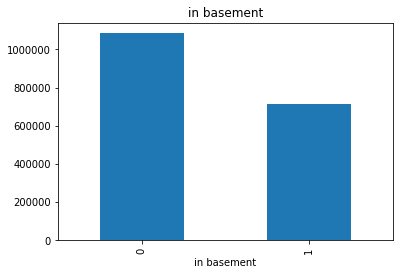

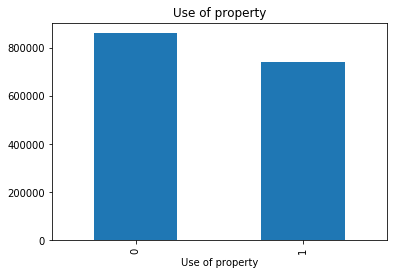

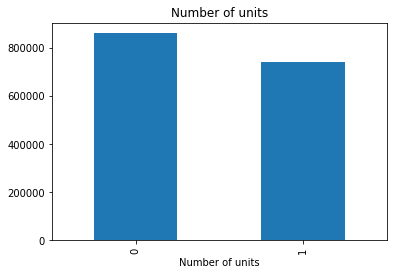

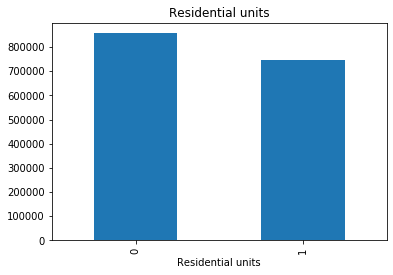

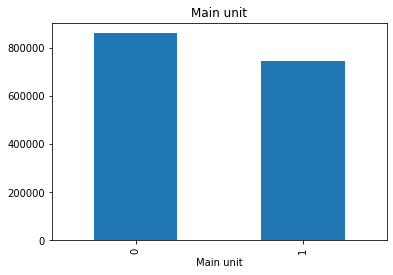

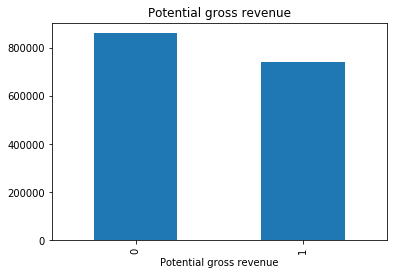

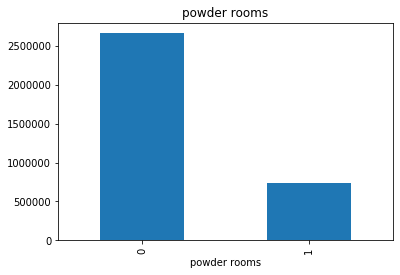

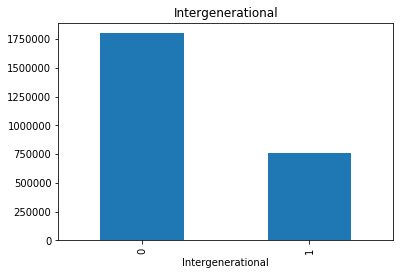

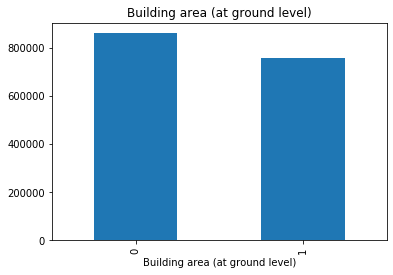

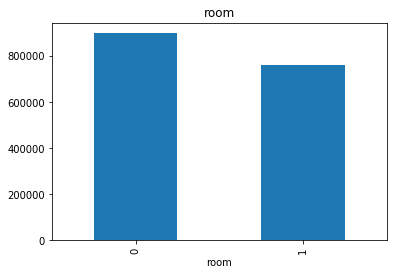

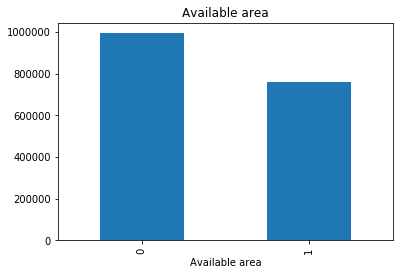

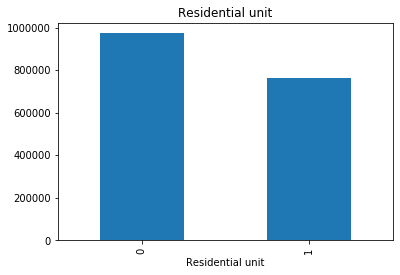

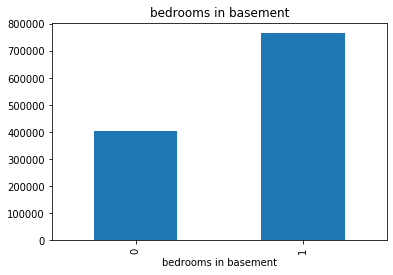

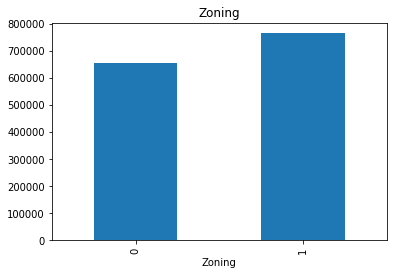

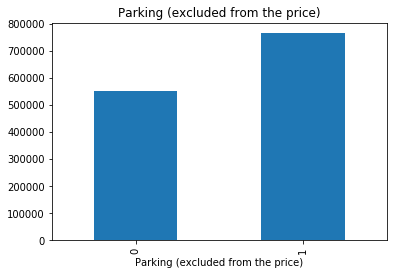

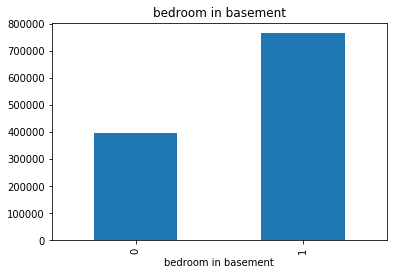

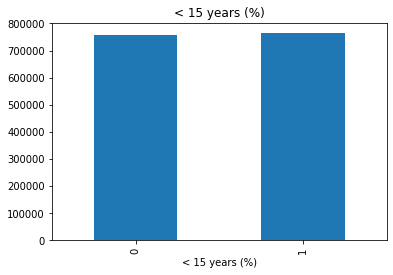

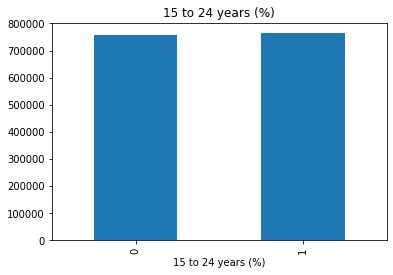

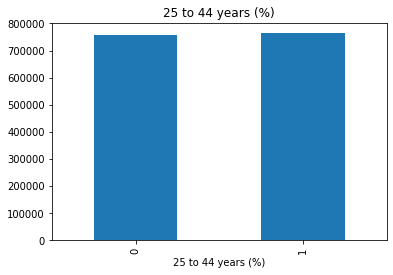

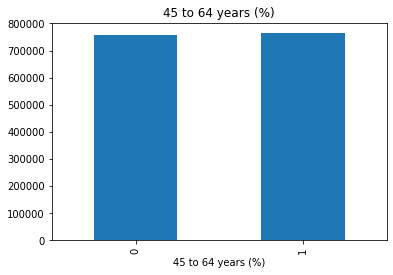

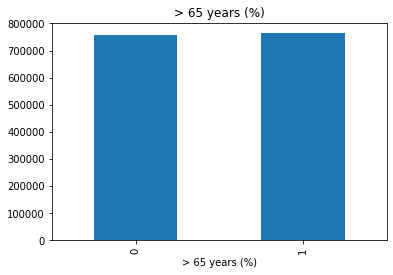

In [6]:
for feature in features_with_nan:
    data = dataset.copy()
    
    # let's make a variable that indicates 1 if the observation was missing or zero otherwise
    data[feature] = np.where(data[feature].isnull(), 1, 0)
    
    # let's calculate the mean price where the information is missing or present
    data.groupby(feature)['price'].mean().plot.bar()
    plt.title(feature)
    plt.show()

Here With the relation between the missing values and the dependent variable is clearly visible. So We need to replace these nan values with something meaningful or drop it.

### 2) Numerical Variables

In [44]:
# converte objects features to float (Net area, Gross area, Lot area, Year built)

#Net area, Gross area, Lot area
data = dataset.copy()
feature_area = ["Net area","Gross area","Lot area"]
for feature in feature_area:
    data[feature]= data[feature].str.replace("sqft","")
    data[feature]= data[feature].str.replace(",","")
    data[feature]= data[feature].astype(float)   

#Year built
data["Year built"]= data["Year built"].str.replace("To be built, New","2021")
data["Year built"]= data["Year built"].str.replace("Under construction, New","2021")
data["Year built"]= data["Year built"].str.replace(", Century","")
data["Year built"]= data["Year built"].str.replace(", New","")
data["Year built"]= data["Year built"].str.replace(", Historic","")
data["Year built"]= data["Year built"].str.replace(", Being converted","")
data["Year built"]= data["Year built"].str.replace("Unknown age","2021")
# data["Year built"]= data["Year built"].astype(float)
data.head()

,Unnamed: 0,title,address,price,lat,long,Restaurants,Shopping,Vibrant,Cycling friendly,Car friendly,Historic,Quiet,Elementary Schools,High Schools,Parks,Nightlife,Groceries,Daycares,Pedestrian friendly,Cafes,Transit friendly,Greenery,rooms,bedrooms,bathroom,Condominium type,Net area,Year built,Parking (total),Population 2016,Population variation between 2011 2016,Population density,Unemployment rate 2016,"Less than $50,000 (%)","Between $50,000 and $80,000 (%)","Between $80,000 and $100,000 (%)","Between $100,000 and $150,000 (%)","More than $150,000 (%)",1-person households (%),2-person households (%),3-person households (%),4-person households (%),5-person or more households (%),Couples without children at home (%),Couples with children at home (%),Single-parent families (%),Owners (%),Renters (%),Before 1960 (%),Between 1961 and 1980 (%),Between 1981 and 1990 (%),Between 1991 and 2000 (%),Between 2001 and 2010 (%),Between 2011 and 2016 (%),Single-family homes (%),Semi-detached or row houses (%),Buildings with less than 5 floors (%),Buildings with 5 or more floors (%),Mobile homes (%),University (%),College (%),Secondary (high) school (%),Apprentice or trade school diploma (%),No diploma (%),Non-immigrant population (%),Immigrant population (%),French (%),English (%),Others languages (%),bathrooms,Pool,Additional features,walk_score,bedroom,Gross area,powder room,Building style,Lot area,Fireplace/Stove,in basement,Use of property,Number of units,Residential units,Main unit,Potential gross revenue,powder rooms,Intergenerational,Building area (at ground level),room,Available area,Residential unit,bedrooms in basement,Zoning,Parking (excluded from the price),bedroom in basement,< 15 years (%),15 to 24 years (%),25 to 44 years (%),45 to 64 years (%),> 65 years (%)
0,0,Condo for sale,"5050, Rue Bannantyne, apt. 203, Montréal (Verd...",409000.0,45.456079,-73.575949,7.0,8.0,5.0,9.0,6.0,5.0,8.0,10.0,7.0,10,3.0,9.0,9.0,10.0,5.0,8.0,5.0,8.0,2.0,1.0,Divided,1014.0,2008,Garage (1),69229,5,7181,8,45,22,9,12,11,42,34,13,8,3,46,36,18,37,63,46,21,13,8,9,4,3,7,69,21,0,43,16,18,9,14,75,25,64.0,22.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Condo for sale,"201, Chemin de la Pointe-Sud, apt. 216, Montré...",680000.0,45.449347,-73.553327,3.0,3.0,1.0,7.0,10.0,0.0,10.0,7.0,0.0,8,0.0,2.0,4.0,3.0,1.0,4.0,5.0,6.0,3.0,NaN,Divided,1249.0,2006,Garage (2),69229,5,7181,8,45,22,9,12,11,42,34,13,8,3,46,36,18,37,63,46,21,13,8,9,4,3,7,69,21,0,43,16,18,9,14,75,25,64.0,22.0,14.0,2.0,"Heated, Inground",Elevator,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Condo for sale,"8800, Rue Verville, apt. 101, Montréal (Ahunts...",283000.0,45.536589,-73.646590,8.0,10.0,5.0,3.0,6.0,2.0,0.0,9.0,7.0,8,4.0,10.0,6.0,8.0,6.0,9.0,4.0,6.0,2.0,1.0,Divided,848.0,2007,Garage (1),134245,6,5545,10,49,23,9,11,9,41,27,13,12,7,34,46,20,39,61,37,33,14,6,6,4,9,5,73,13,0,36,16,20,10,17,59,41,65.0,10.0,25.0,NaN,NaN,NaN,72.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Condo for sale,"185, Rue du Séminaire, apt. 605, Montréal (Le ...",339000.0,45.490915,-73.560779,10.0,10.0,9.0,9.0,5.0,6.0,7.0,7.0,4.0,10,9.0,10.0,8.0,10.0,10.0,9.0,5.0,4.0,NaN,1.0,Divided,NaN,2013,NaN,80153,9,5070,8,50,22,9,11,7,46,32,11,7,4,44,32,24,35,65,43,18,11,5,10,13,2,7,71,20,0,38,16,19,9,18,74,26,59.0,26.0,15.0,NaN,"Heated, Inground, Indoor","Adapted for reduced mobility, Elevator",70.0,1.0,621.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Condo for sale,"7075, Rue Bombardier, apt. 108, Montréal (Anjou)",177800.0,45.606186,-73.588353,6.0,7.0,3.0,4.0,9.0,0.0,6.0,4.0,5.0,8,3.0,9.0,2.0,7.0,4.0,7.0,5.0,6.0,NaN,1.0,Divided,586.0,1993,Driveway (1),42796,2,3103,10,45,26,10,12,7,38,31,13,12,7,38,41,21,44,56,15,49,16,10,10,1,8,9,65,18,0,25,17,2

In [24]:
numerical_features = [feature for feature in data.columns if data[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
data[numerical_features].head()

Number of numerical variables:  77


,Unnamed: 0,price,lat,long,Restaurants,Shopping,Vibrant,Cycling friendly,Car friendly,Historic,Quiet,Elementary Schools,High Schools,Parks,Nightlife,Groceries,Daycares,Pedestrian friendly,Cafes,Transit friendly,Greenery,rooms,bedrooms,bathroom,Population 2016,Population variation between 2011 2016,Population density,Unemployment rate 2016,"Less than $50,000 (%)","Between $50,000 and $80,000 (%)","Between $80,000 and $100,000 (%)","Between $100,000 and $150,000 (%)","More than $150,000 (%)",1-person households (%),2-person households (%),3-person households (%),4-person households (%),5-person or more households (%),Couples without children at home (%),Couples with children at home (%),Single-parent families (%),Owners (%),Renters (%),Before 1960 (%),Between 1961 and 1980 (%),Between 1981 and 1990 (%),Between 1991 and 2000 (%),Between 2001 and 2010 (%),Between 2011 and 2016 (%),Single-family homes (%),Semi-detached or row houses (%),Buildings with less than 5 floors (%),Buildings with 5 or more floors (%),Mobile homes (%),University (%),College (%),Secondary (high) school (%),Apprentice or trade school diploma (%),No diploma (%),Non-immigrant population (%),Immigrant population (%),French (%),English (%),Others languages (%),bathrooms,walk_score,bedroom,powder room,powder rooms,room,bedrooms in basement,bedroom in basement,< 15 years (%),15 to 24 years (%),25 to 44 years (%),45 to 64 years (%),> 65 years (%)
0,0,409000.0,45.456079,-73.575949,7.0,8.0,5.0,9.0,6.0,5.0,8.0,10.0,7.0,10,3.0,9.0,9.0,10.0,5.0,8.0,5.0,8.0,2.0,1.0,69229,5,7181,8,45,22,9,12,11,42,34,13,8,3,46,36,18,37,63,46,21,13,8,9,4,3,7,69,21,0,43,16,18,9,14,75,25,64.0,22.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,680000.0,45.449347,-73.553327,3.0,3.0,1.0,7.0,10.0,0.0,10.0,7.0,0.0,8,0.0,2.0,4.0,3.0,1.0,4.0,5.0,6.0,3.0,NaN,69229,5,7181,8,45,22,9,12,11,42,34,13,8,3,46,36,18,37,63,46,21,13,8,9,4,3,7,69,21,0,43,16,18,9,14,75,25,64.0,22.0,14.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,283000.0,45.536589,-73.646590,8.0,10.0,5.0,3.0,6.0,2.0,0.0,9.0,7.0,8,4.0,10.0,6.0,8.0,6.0,9.0,4.0,6.0,2.0,1.0,134245,6,5545,10,49,23,9,11,9,41,27,13,12,7,34,46,20,39,61,37,33,14,6,6,4,9,5,73,13,0,36,16,20,10,17,59,41,65.0,10.0,25.0,NaN,4.276666,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,339000.0,45.490915,-73.560779,10.0,10.0,9.0,9.0,5.0,6.0,7.0,7.0,4.0,10,9.0,10.0,8.0,10.0,10.0,9.0,5.0,4.0,NaN,1.0,80153,9,5070,8,50,22,9,11,7,46,32,11,7,4,44,32,24,35,65,43,18,11,5,10,13,2,7,71,20,0,38,16,19,9,18,74,26,59.0,26.0,15.0,NaN,4.248495,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,177800.0,45.606186,-73.588353,6.0,7.0,3.0,4.0,9.0,0.0,6.0,4.0,5.0,8,3.0,9.0,2.0,7.0,4.0,7.0,5.0,6.0,NaN,1.0,42796,2,3103,10,45,26,10,12,7,38,31,13,12,7,38,41,21,44,56,15,49,16,10,10,1,8,9,65,18,0,25,17,23,14,20,66,34,76.0,8.0,16.0,NaN,3.970292,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0.5, 1.0, 'House Price vs Year')

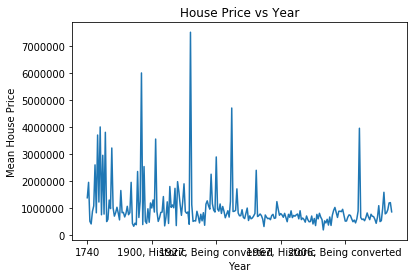

In [25]:
## Lets analyze the Datetime Variables
## We will check whether there is a relation between year the house is sold and the sales price

data.groupby('Year built')['price'].mean().plot()
plt.xlabel('Year')
plt.ylabel('Mean House Price')
plt.title("House Price vs Year")

In [26]:
## Numerical variables are usually of 2 type
## 1. Continous variable and Discrete Variables
dataset=data.copy()

discrete_feature=[feature for feature in numerical_features if len(dataset[feature].unique())<25 and feature not in ['Unnamed: 0','Year built']]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 71


In [27]:
discrete_feature

['Restaurants',
 'Shopping',
 'Vibrant',
 'Cycling friendly',
 'Car friendly',
 'Historic',
 'Quiet',
 'Elementary Schools',
 'High Schools',
 'Parks',
 'Nightlife',
 'Groceries',
 'Daycares',
 'Pedestrian friendly',
 'Cafes',
 'Transit friendly',
 'Greenery',
 'bedrooms',
 'bathroom',
 'Population 2016 ',
 'Population variation between 2011 2016 ',
 'Population density ',
 'Unemployment rate 2016 ',
 'Less than $50,000 (%)',
 'Between $50,000 and $80,000 (%)',
 'Between $80,000 and $100,000 (%)',
 'Between $100,000 and $150,000 (%)',
 'More than $150,000 (%)',
 '1-person households (%)',
 '2-person households (%)',
 '3-person households (%)',
 '4-person households (%)',
 '5-person or more households (%)',
 'Couples without children at home (%)',
 'Couples with children at home (%)',
 'Single-parent families (%)',
 'Owners (%)',
 'Renters (%)',
 'Before 1960 (%)',
 'Between 1961 and 1980 (%)',
 'Between 1981 and 1990 (%)',
 'Between 1991 and 2000 (%)',
 'Between 2001 and 2010 (%)',
 'B

In [28]:
dataset[discrete_feature].head()

,Restaurants,Shopping,Vibrant,Cycling friendly,Car friendly,Historic,Quiet,Elementary Schools,High Schools,Parks,Nightlife,Groceries,Daycares,Pedestrian friendly,Cafes,Transit friendly,Greenery,bedrooms,bathroom,Population 2016,Population variation between 2011 2016,Population density,Unemployment rate 2016,"Less than $50,000 (%)","Between $50,000 and $80,000 (%)","Between $80,000 and $100,000 (%)","Between $100,000 and $150,000 (%)","More than $150,000 (%)",1-person households (%),2-person households (%),3-person households (%),4-person households (%),5-person or more households (%),Couples without children at home (%),Couples with children at home (%),Single-parent families (%),Owners (%),Renters (%),Before 1960 (%),Between 1961 and 1980 (%),Between 1981 and 1990 (%),Between 1991 and 2000 (%),Between 2001 and 2010 (%),Between 2011 and 2016 (%),Single-family homes (%),Semi-detached or row houses (%),Buildings with less than 5 floors (%),Buildings with 5 or more floors (%),Mobile homes (%),University (%),College (%),Secondary (high) school (%),Apprentice or trade school diploma (%),No diploma (%),Non-immigrant population (%),Immigrant population (%),French (%),English (%),Others languages (%),bathrooms,bedroom,powder room,powder rooms,room,bedrooms in basement,bedroom in basement,< 15 years (%),15 to 24 years (%),25 to 44 years (%),45 to 64 years (%),> 65 years (%)
0,7.0,8.0,5.0,9.0,6.0,5.0,8.0,10.0,7.0,10,3.0,9.0,9.0,10.0,5.0,8.0,5.0,2.0,1.0,69229,5,7181,8,45,22,9,12,11,42,34,13,8,3,46,36,18,37,63,46,21,13,8,9,4,3,7,69,21,0,43,16,18,9,14,75,25,64.0,22.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3.0,3.0,1.0,7.0,10.0,0.0,10.0,7.0,0.0,8,0.0,2.0,4.0,3.0,1.0,4.0,5.0,3.0,NaN,69229,5,7181,8,45,22,9,12,11,42,34,13,8,3,46,36,18,37,63,46,21,13,8,9,4,3,7,69,21,0,43,16,18,9,14,75,25,64.0,22.0,14.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8.0,10.0,5.0,3.0,6.0,2.0,0.0,9.0,7.0,8,4.0,10.0,6.0,8.0,6.0,9.0,4.0,2.0,1.0,134245,6,5545,10,49,23,9,11,9,41,27,13,12,7,34,46,20,39,61,37,33,14,6,6,4,9,5,73,13,0,36,16,20,10,17,59,41,65.0,10.0,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10.0,10.0,9.0,9.0,5.0,6.0,7.0,7.0,4.0,10,9.0,10.0,8.0,10.0,10.0,9.0,5.0,NaN,1.0,80153,9,5070,8,50,22,9,11,7,46,32,11,7,4,44,32,24,35,65,43,18,11,5,10,13,2,7,71,20,0,38,16,19,9,18,74,26,59.0,26.0,15.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6.0,7.0,3.0,4.0,9.0,0.0,6.0,4.0,5.0,8,3.0,9.0,2.0,7.0,4.0,7.0,5.0,NaN,1.0,42796,2,3103,10,45,26,10,12,7,38,31,13,12,7,38,41,21,44,56,15,49,16,10,10,1,8,9,65,18,0,25,17,23,14,20,66,34,76.0,8.0,16.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


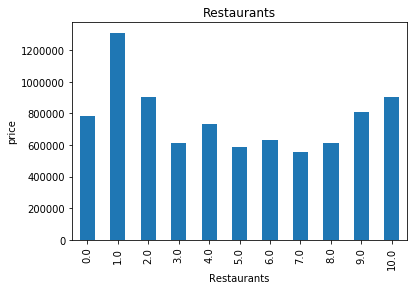

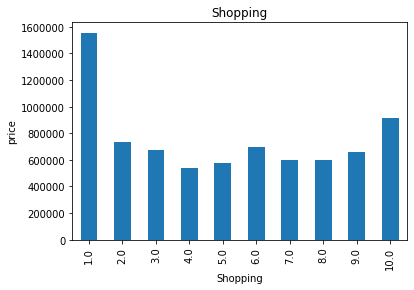

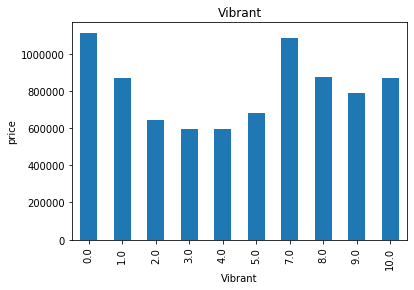

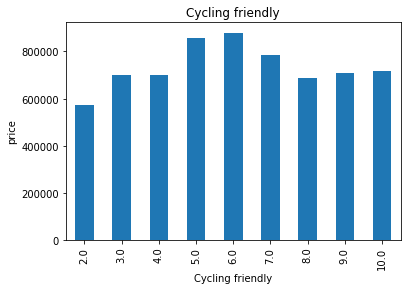

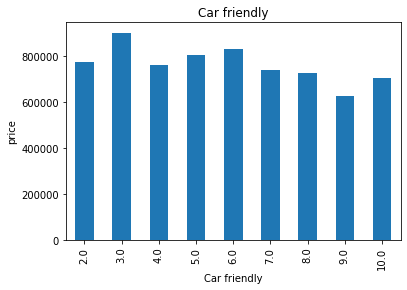

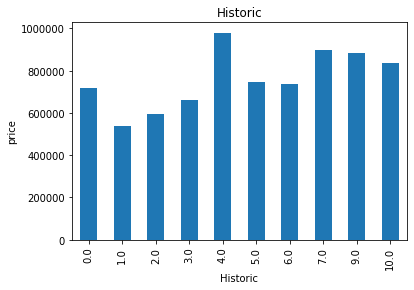

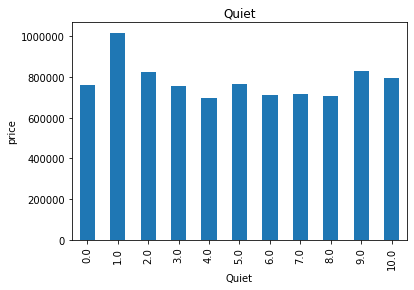

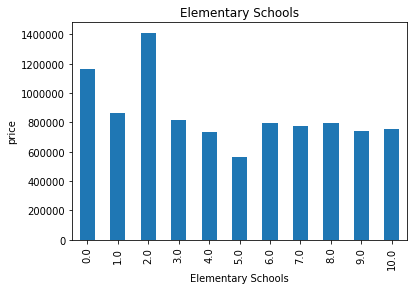

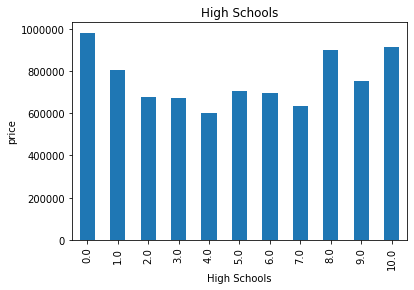

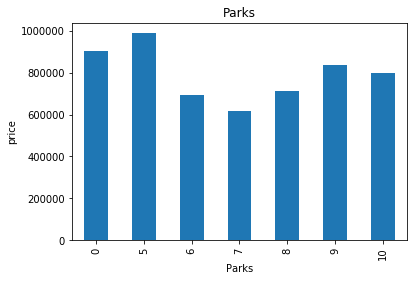

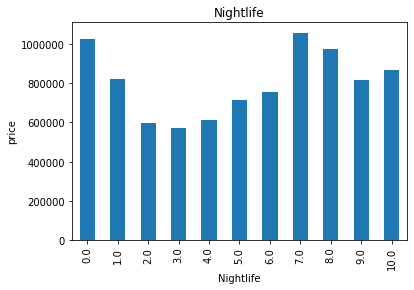

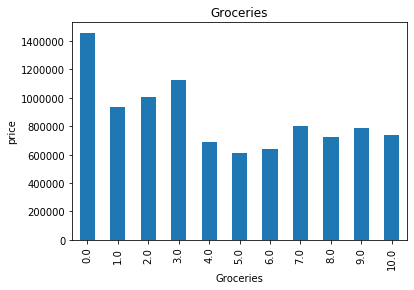

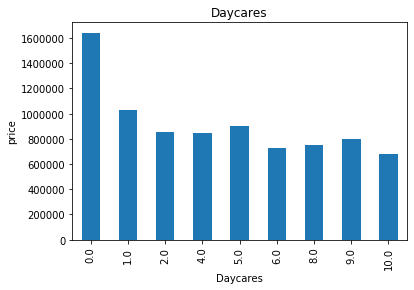

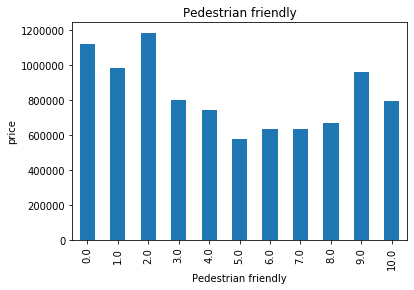

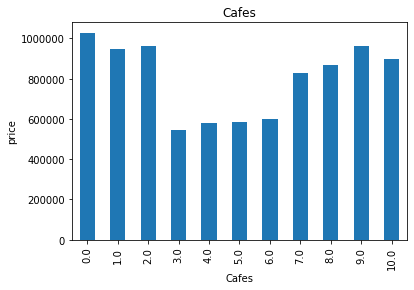

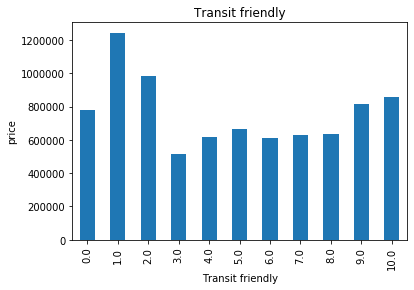

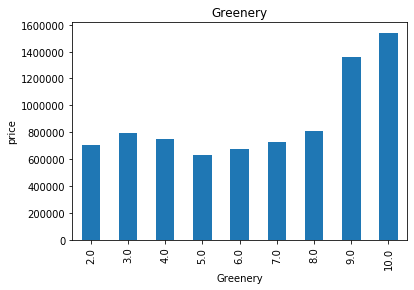

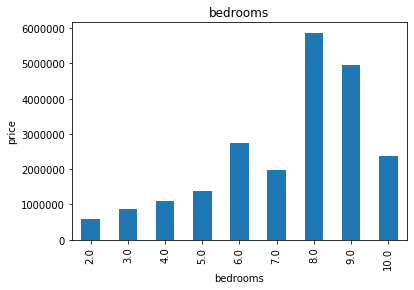

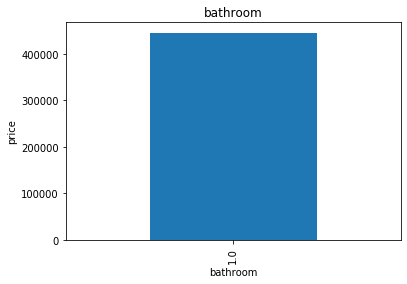

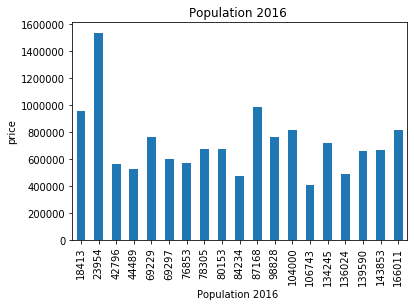

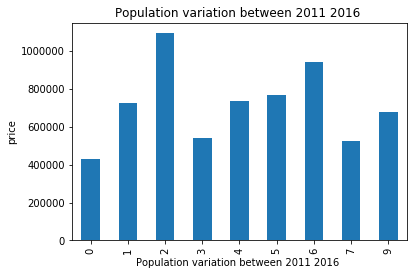

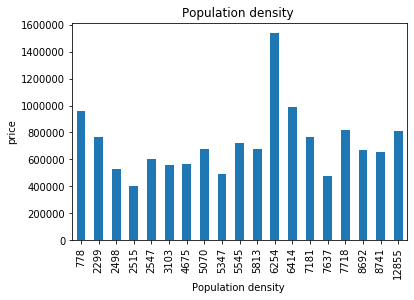

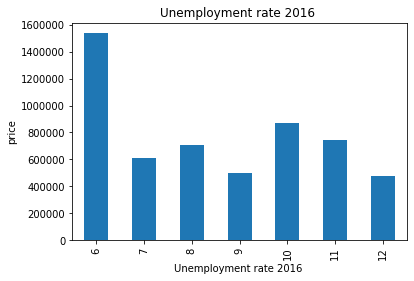

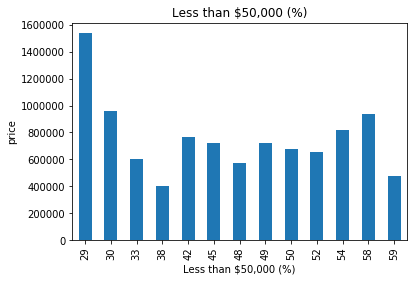

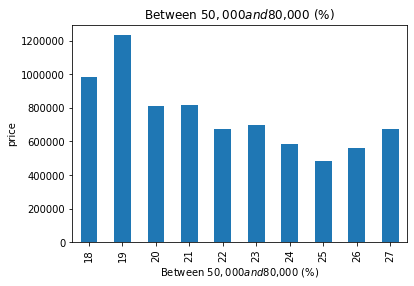

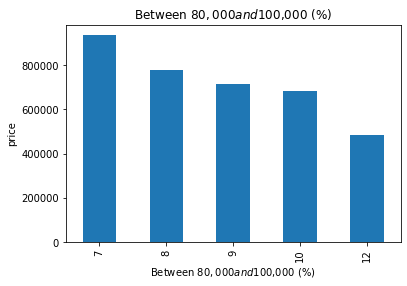

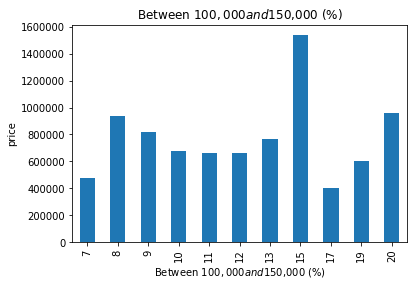

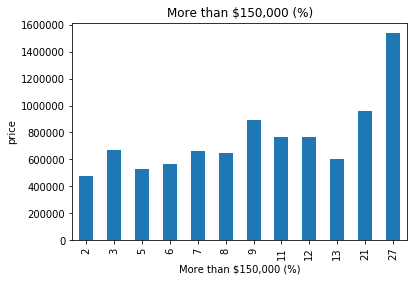

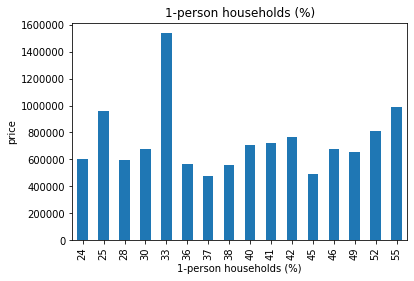

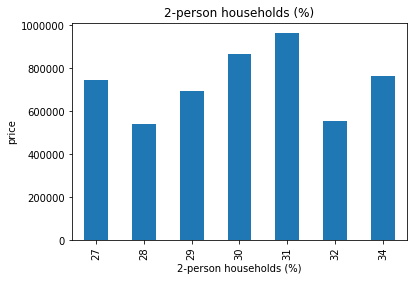

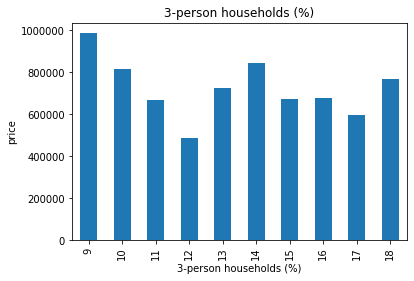

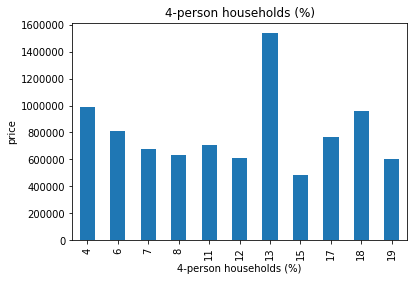

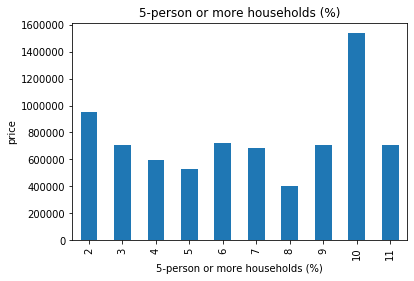

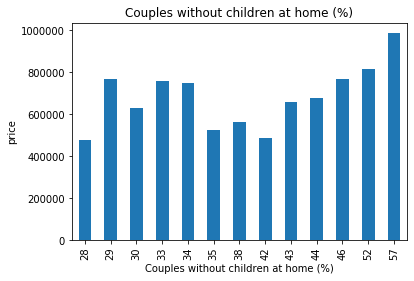

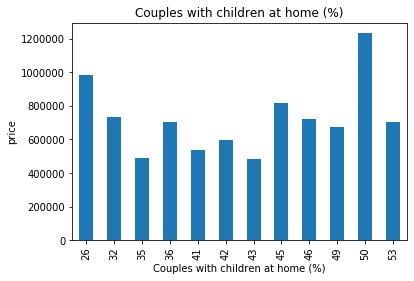

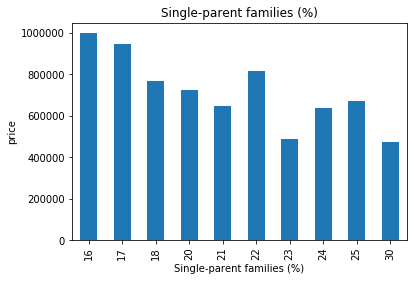

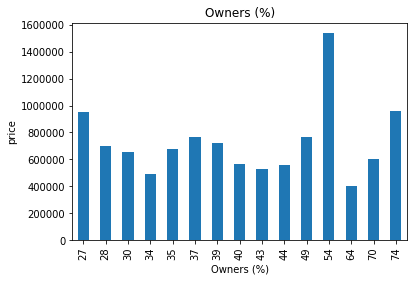

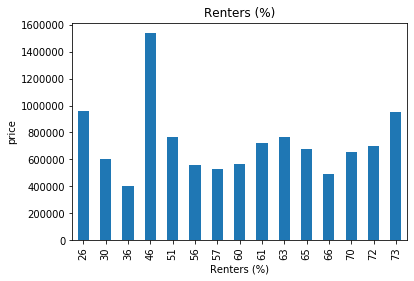

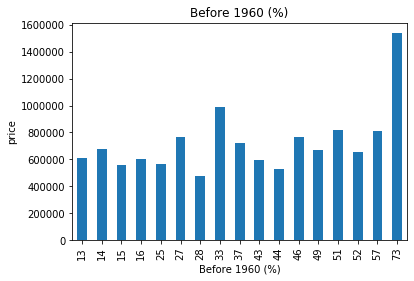

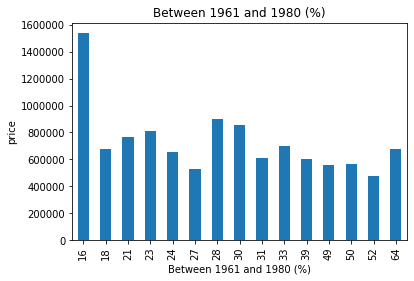

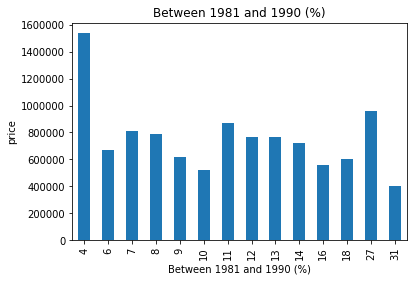

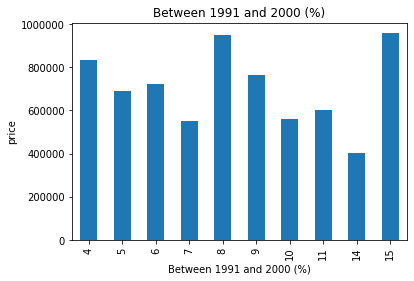

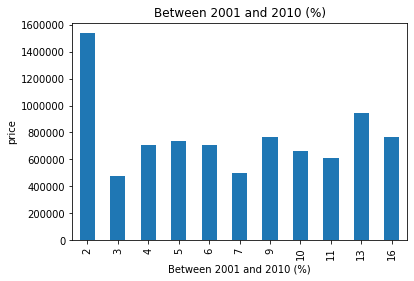

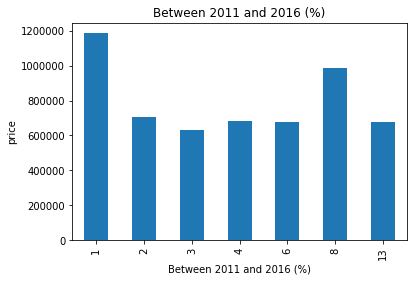

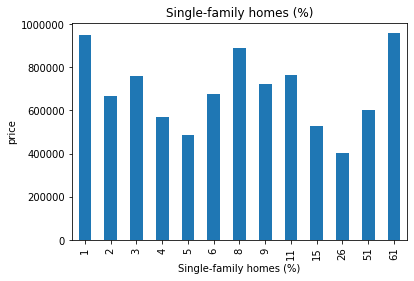

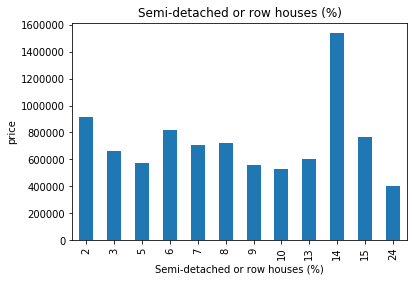

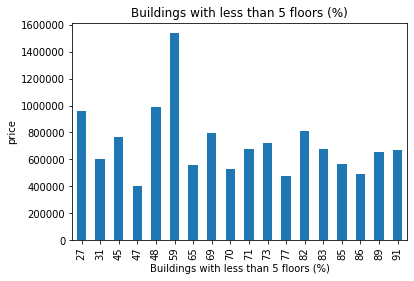

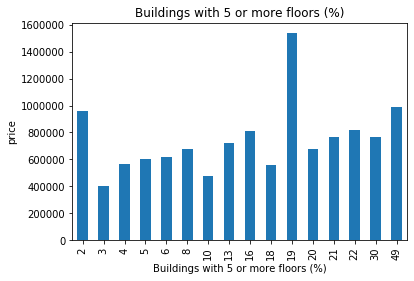

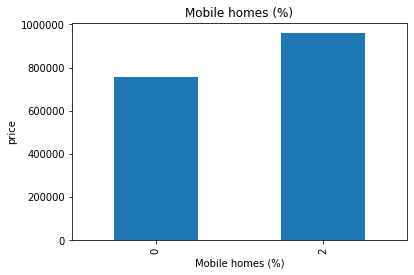

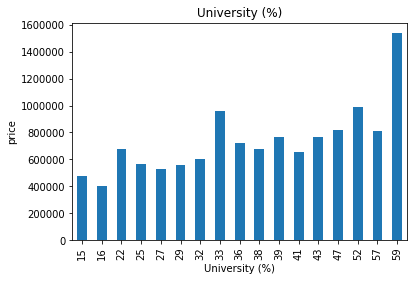

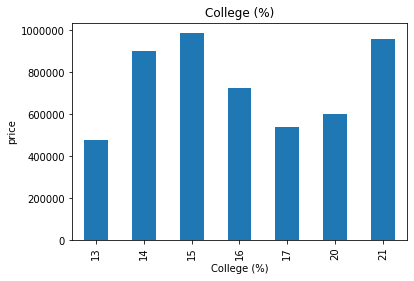

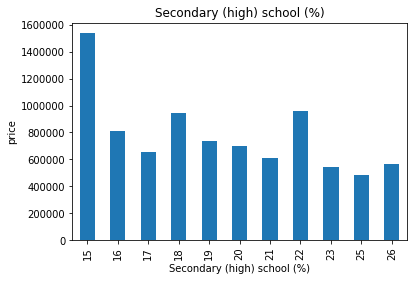

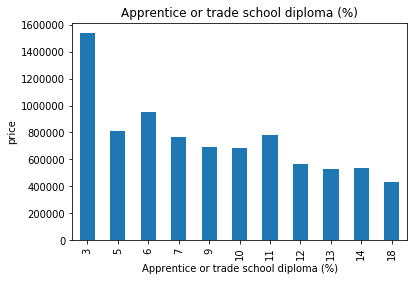

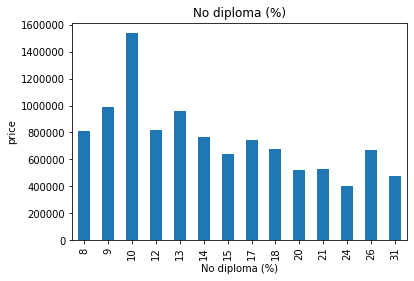

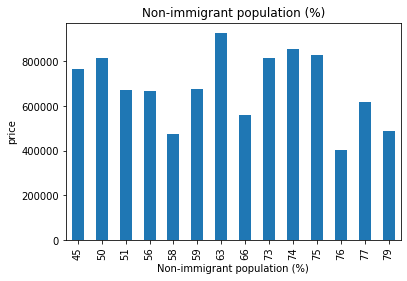

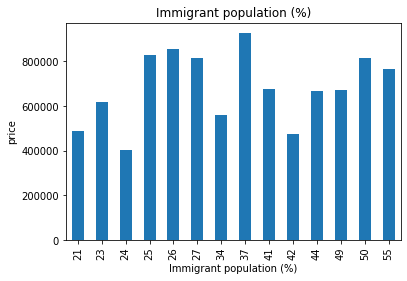

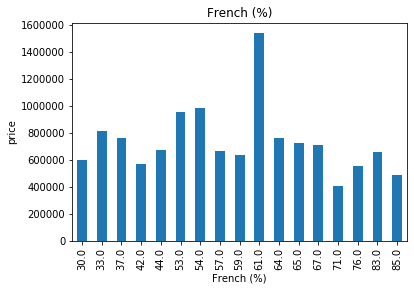

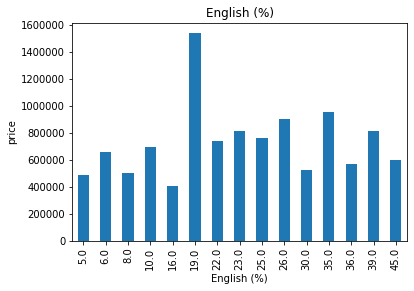

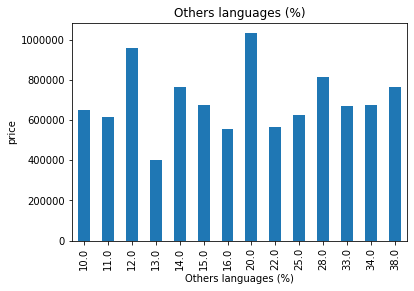

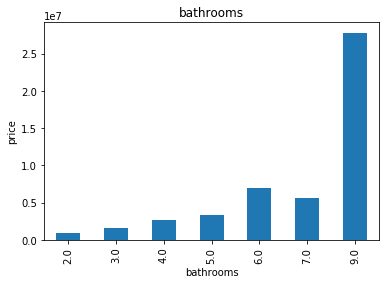

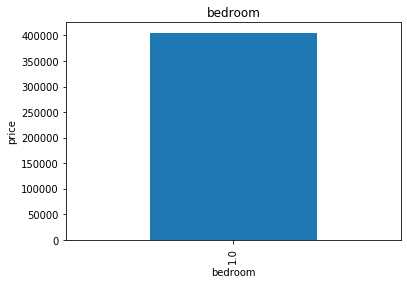

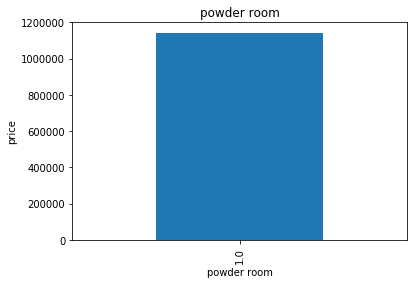

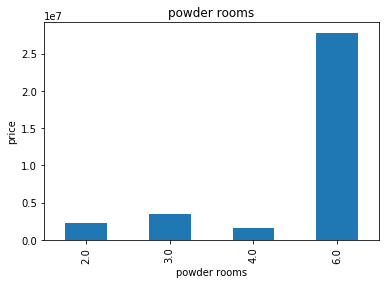

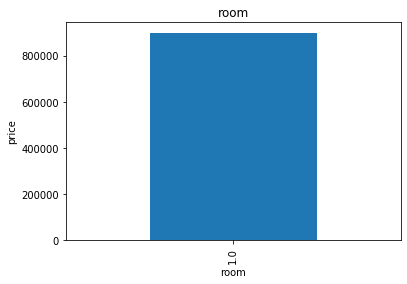

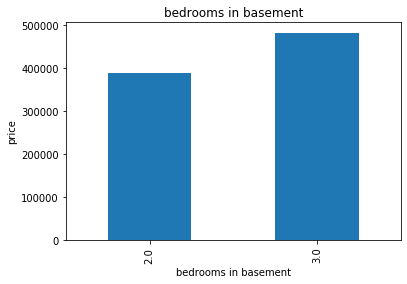

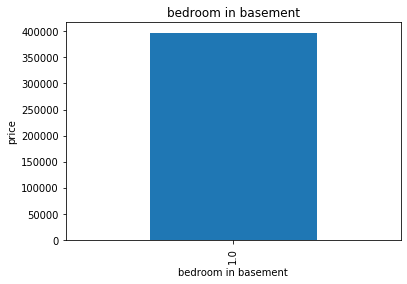

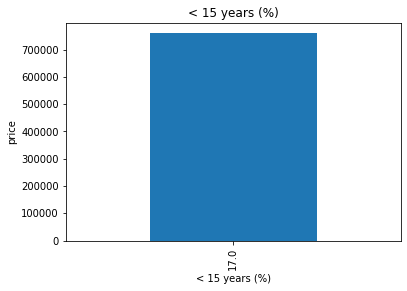

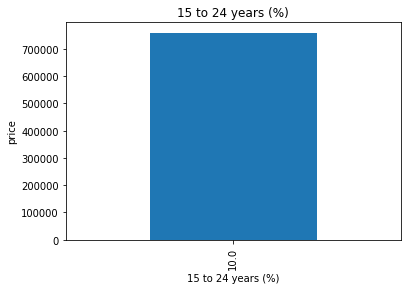

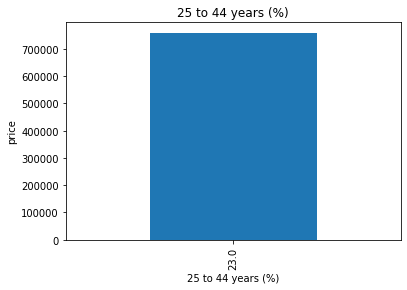

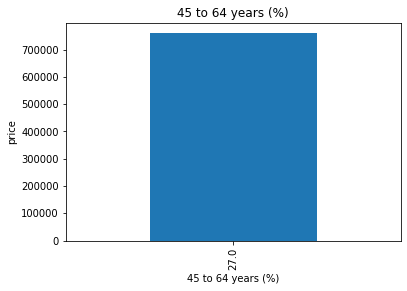

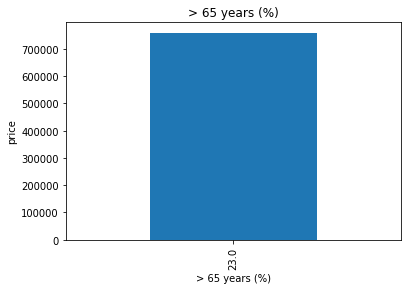

In [29]:
## Lets Find the realtionship between them and Sale PRice

for feature in discrete_feature:
    data.groupby(feature)['price'].mean().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('price')
    plt.title(feature)
    plt.show()

### 2) Continuous Variables

In [30]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature+['Unnamed: 0','Year built']]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 5


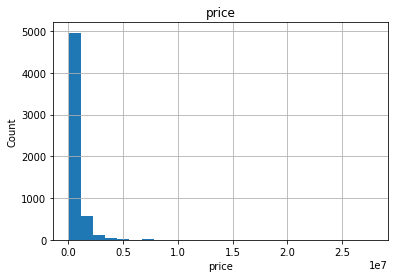

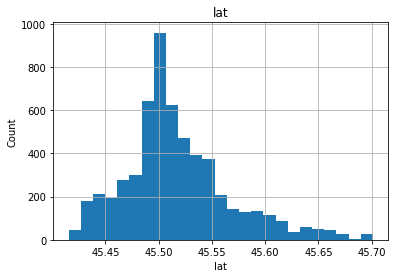

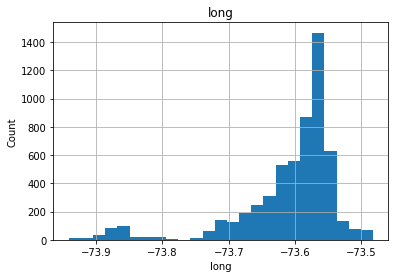

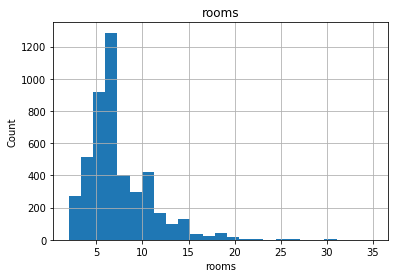

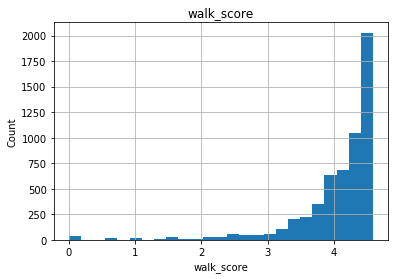

In [31]:
## Lets analyse the continuous values by creating histograms to understand the distribution

for feature in continuous_feature:
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()


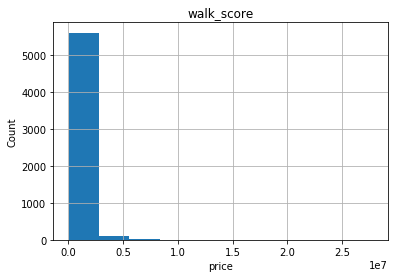

In [32]:
## Lets analyse the continuous values by creating histograms to understand the distribution

data['price'].hist()
plt.xlabel('price')
plt.ylabel('Count')
plt.title(feature)
plt.show()


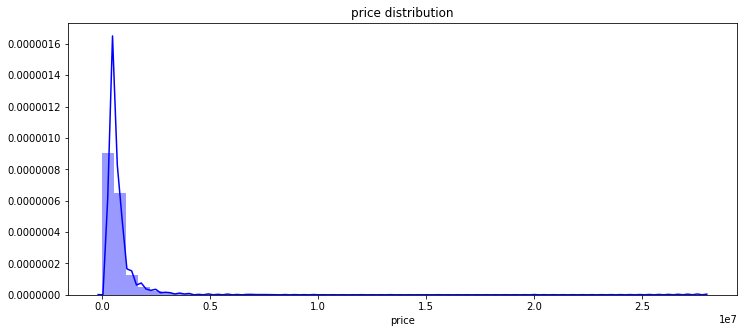

In [33]:
plt.figure(figsize=(12,5))
plt.title('price distribution')
plt.xlabel('Price')
ax = sns.distplot(data["price"], color = 'b')

In [71]:
data_price=[pri for pri in data.price if pri< 500000]
data_price[1]

283000.0

In [35]:
data_ = pd.DataFrame({'price':data_price})
print(data_['price'])

0       409000.0
1       283000.0
2       339000.0
3       177800.0
4       365000.0
          ...   
2443     60000.0
2444     60000.0
2445     65000.0
2446    279000.0
2447    499000.0
Name: price, Length: 2448, dtype: float64


TypeError: list indices must be integers or slices, not str

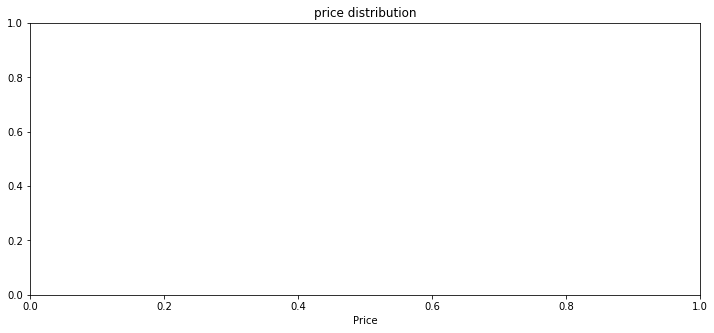

In [36]:
plt.figure(figsize=(12,5))
plt.title('price distribution')
plt.xlabel('Price')
ax = sns.distplot(data_price["price"], color = 'b')

### Outliers

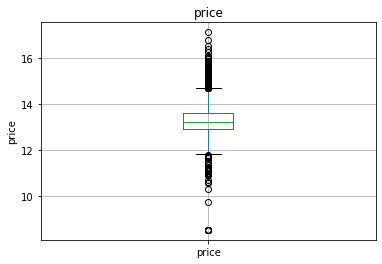

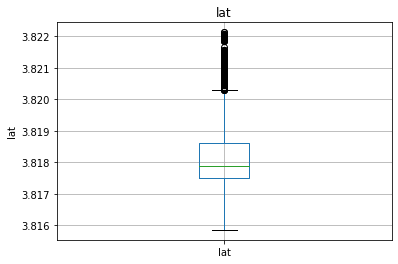

/home/bilal/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


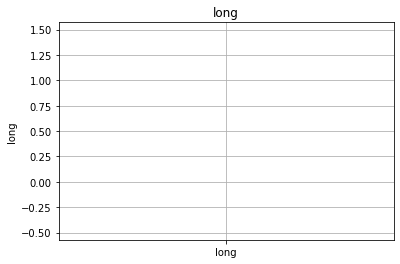

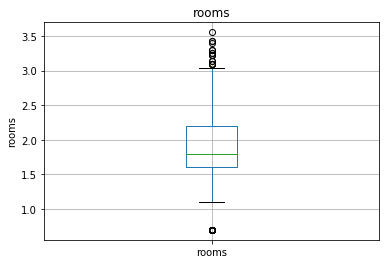

In [37]:
for feature in continuous_feature:
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

### Categorical Variables

In [65]:
categorical_features=[feature for feature in data.columns if data[feature].dtypes=='O' and feature not in ['address']]
categorical_features

['title',
 'Condominium type',
 'Year built',
 'Parking (total)',
 'Pool',
 'Additional features',
 'Building style',
 'Fireplace/Stove',
 'in basement',
 'Use of property',
 'Number of units',
 'Residential units',
 'Main unit',
 'Potential gross revenue',
 'Intergenerational',
 'Building area (at ground level)',
 'Available area',
 'Residential unit',
 'Zoning',
 'Parking (excluded from the price)']

In [66]:
data[categorical_features].head()

,title,Condominium type,Year built,Parking (total),Pool,Additional features,Building style,Fireplace/Stove,in basement,Use of property,Number of units,Residential units,Main unit,Potential gross revenue,Intergenerational,Building area (at ground level),Available area,Residential unit,Zoning,Parking (excluded from the price)
0,Condo for sale,Divided,2008,Garage (1),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Condo for sale,Divided,2006,Garage (2),"Heated, Inground",Elevator,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Condo for sale,Divided,2007,Garage (1),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Condo for sale,Divided,2013,NaN,"Heated, Inground, Indoor","Adapted for reduced mobility, Elevator",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Condo for sale,Divided,1993,Driveway (1),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
for feature in categorical_features:
    print('The feature is ( {} ) and number of categories are {}'.format(feature,len(data[feature].unique())))

The feature is ( title ) and number of categories are 10
The feature is ( Condominium type ) and number of categories are 3
The feature is ( Year built ) and number of categories are 157
The feature is ( Parking (total) ) and number of categories are 88
The feature is ( Pool ) and number of categories are 12
The feature is ( Additional features ) and number of categories are 84
The feature is ( Building style ) and number of categories are 14
The feature is ( Fireplace/Stove ) and number of categories are 22
The feature is ( in basement ) and number of categories are 5
The feature is ( Use of property ) and number of categories are 3
The feature is ( Number of units ) and number of categories are 17
The feature is ( Residential units ) and number of categories are 218
The feature is ( Main unit ) and number of categories are 127
The feature is ( Potential gross revenue ) and number of categories are 558
The feature is ( Intergenerational ) and number of categories are 17
The feature is

In [68]:
data['title'].unique()

array(['Condo for sale', 'House for sale', 'Duplex for sale',
       'Quadruplex for sale', 'Condominium house for sale',
       'Triplex for sale', 'Loft / Studio for sale', 'Land for sale',
       'Lot for sale', 'Quintuplex for sale'], dtype=object)

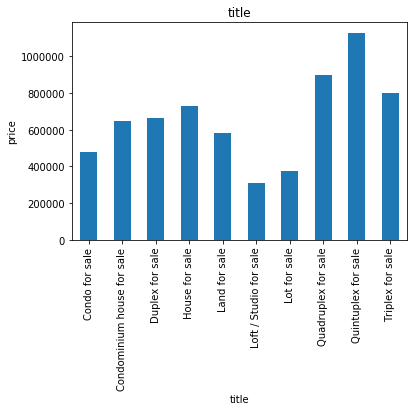

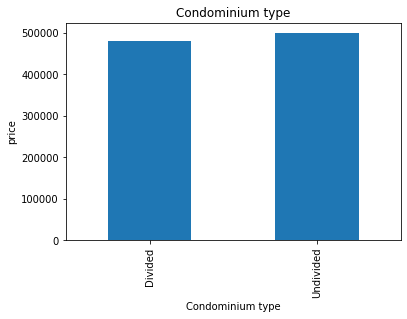

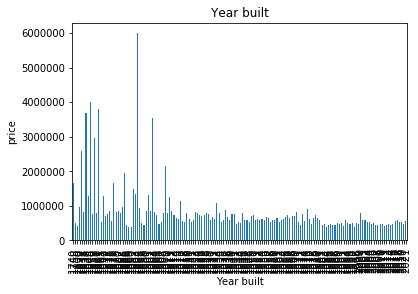

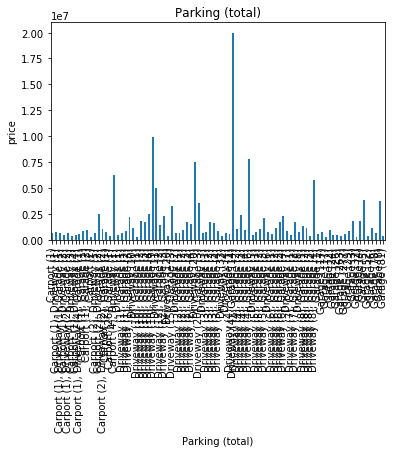

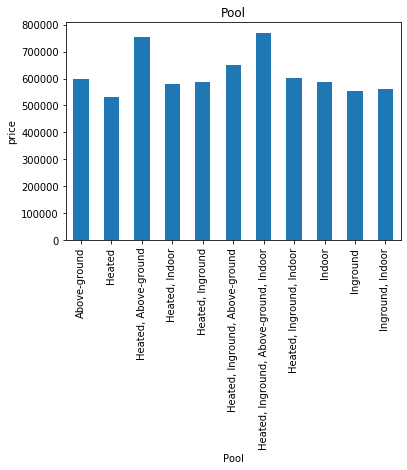

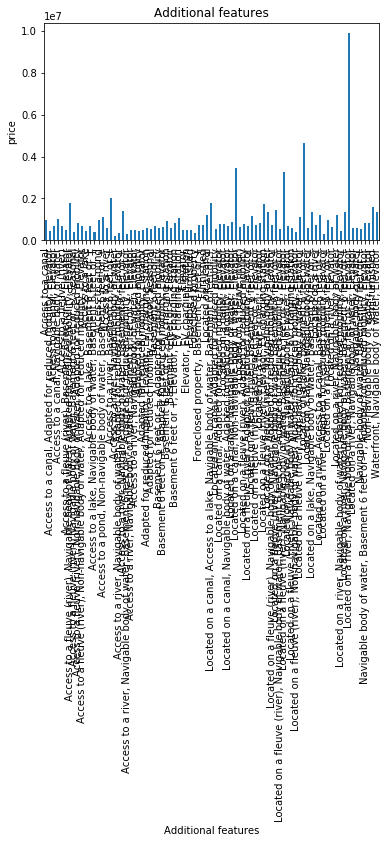

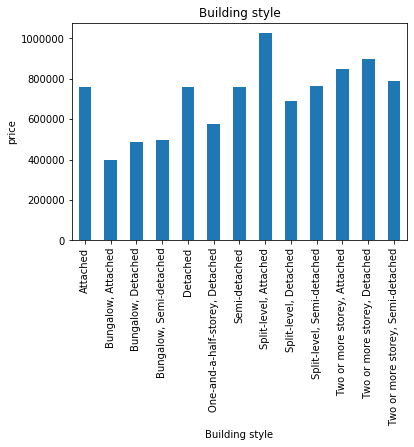

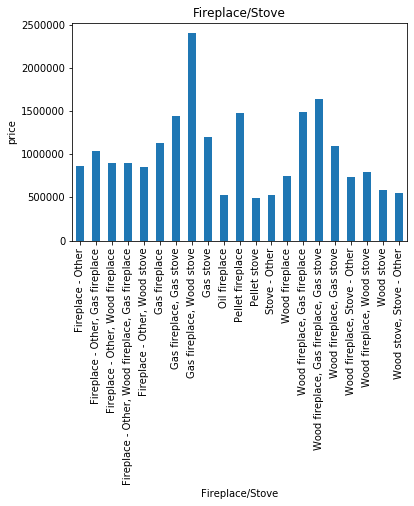

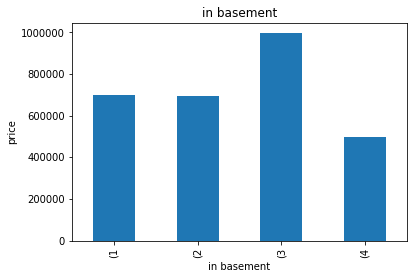

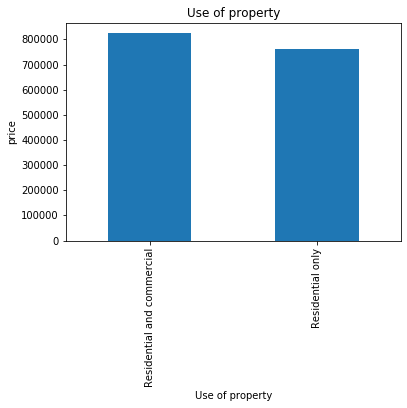

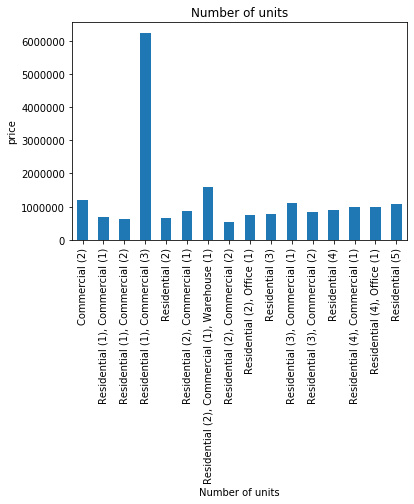

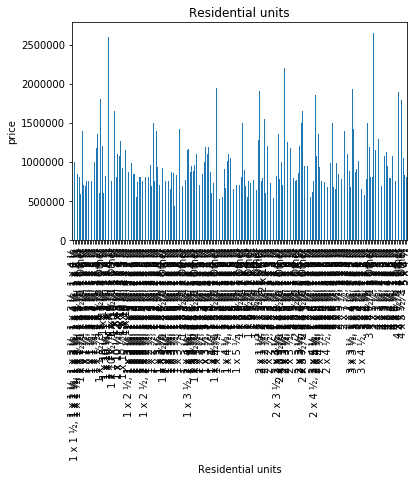

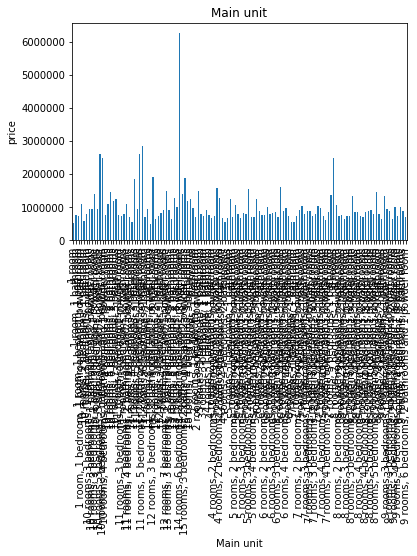

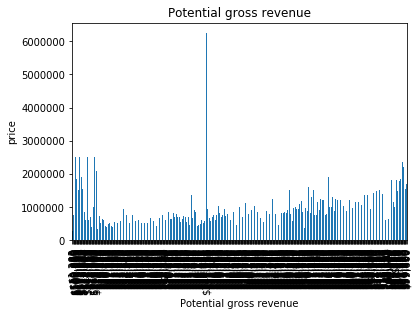

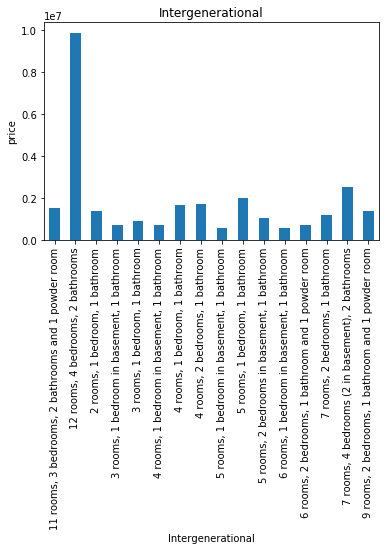

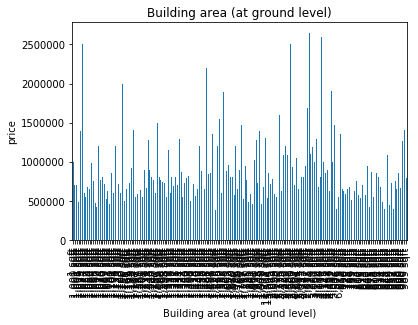

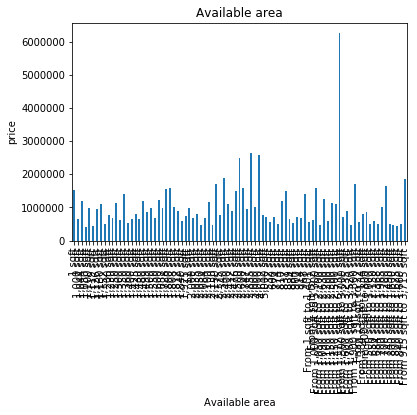

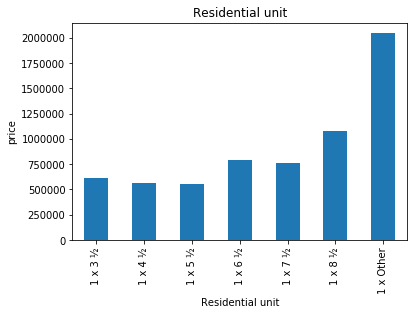

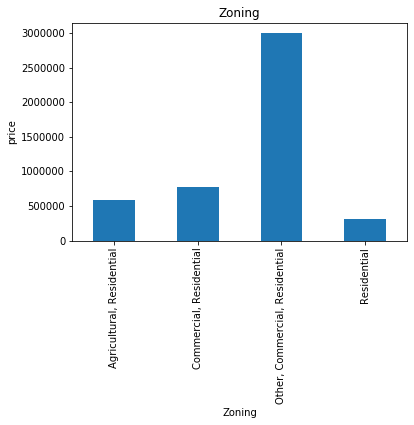

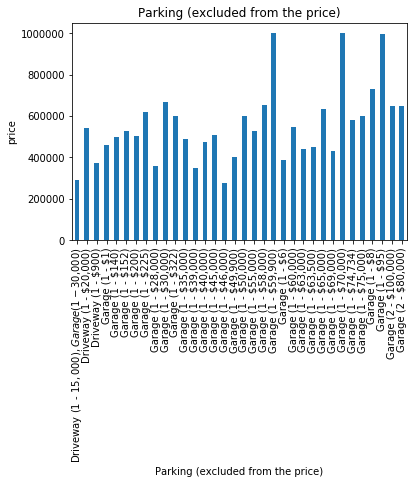

In [69]:
## Find out the relationship between categorical variable and dependent feature price
for feature in categorical_features:
    data.groupby(feature)['price'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('price')
    plt.title(feature)
    plt.show()